# Designing an Aileron Controller Using Mini-Batch Gradient Descent

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. The aim of this project is to design a controller to manage the ailerons of an aircraft using linear regression model called as mini-batch gradient descent.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [ ]:
print(df)
# df.columns

       inputs ClimbRate  Sgz     P     Q  CurPitch  CurRoll  AbsRoll  DiffClb  \
0                   -17   -6 -0.03  0.14      0.59     -0.5      -11       -9   
1                  -791   15 -0.28 -0.34      1.11      0.9      -10       27   
2                   -46   48 -0.42  0.07      0.57      0.6       -5       -8   
3                   496   -5 -0.21 -0.04      0.03     -0.5       -7        6   
4                  -124   16 -0.02  0.05      0.61     -0.2       -9       -3   
...                 ...  ...   ...   ...       ...      ...      ...      ...   
13745               -53  -13 -0.07  0.02      0.58     -2.3      -15       12   
13746                 1    4 -0.11 -0.07      0.47      0.8       -5        8   
13747               425  -14  0.40  0.07      0.41     -2.1      -16       12   
13748               102  -10 -0.19  0.08      1.30      0.5      -10       -3   
13749              -165   52  0.08  0.42      1.07     -1.6      -22      -15   

       DiffRollRate  DiffDi

In [ ]:
X = df.drop(['Goal'], axis = 1)
y = df['Goal']

#splitting 70% of the total data for the training set
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.3, random_state = 1)

#splitting the remaining 30% into validation and test set 
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 1)    #test_size = 0.15/0.3

# print(X_train.shape, y_train.shape)
# print(X_rem.shape, y_rem.shape)
# print(X_val.shape, y_val.shape)
# print(X_test.shape, y_test.shape)

#standardizing the training, validation, and test set
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

In [ ]:
#adding a column of 1 as a first column in each data set

X_train_ones = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_val_ones = np.c_[np.ones(X_val_std.shape[0]), X_val_std]
X_test_ones = np.c_[np.ones(X_test_std.shape[0]), X_test_std]

# print(X_train_ones.shape, X_val_ones.shape, X_test_ones.shape)

## Linear Regression Using Direct Solution

In [ ]:
#function for calculation rmse values

def rmse(yPred, y):
  return np.sqrt(mean_squared_error(yPred, y))

In [ ]:
#direct solution
W = np.dot(linalg.inv(np.dot(X_train_ones.T, X_train_ones)), np.dot(X_train_ones.T, y_train))

#predictions on training and validation set
y_pred_train = np.dot(X_train_ones, W)
y_pred_val = np.dot(X_val_ones, W)

#rmse
rmse_train = rmse(y_pred_train, y_train)
rmse_val = rmse(y_pred_val, y_val)

print('RMSE of Training Set: ', rmse_train)
print('RMSE of Validation Set: ', rmse_val)

RMSE of Training Set:  0.00017529314691535266
RMSE of Validation Set:  0.00017434713417248976


## Full Batch Gradient Descent

Here, a full batch gradient descent algorithm is implemented and the training time for the model recorded. Full batch gradient descent is,

 $$w_t = w_{t-1} - \alpha~g_t$$ 
 
 where $\alpha$ is the learning rate and $g_t$ is the gradient, computed on the entire data. 


A fixed learning rate of $\alpha= 0.01$ is taken, and iterations are done until the model's validation RMSE converges.
The gradient descent is considered to have converged when RMSE on the validation set using gradient descent satisfies the following:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution. 

Here, convergenge threshold (CT) is $RMSE_\text{Direct Solution}\times 1.001$

In [ ]:
import time

rmse_grad_train_arr = []
rmse_grad_val_arr = []

lr = 0.01   #learning rate
c_threshold = 1.001*rmse_val    #convergence threshold

w = (np.random.random(X_train_ones.shape[1])/1000).reshape(1,-1)   #generating random initial weights

#converting y_train and y_val to mumpy arrays
y_train = np.array(y_train).reshape(-1,1)
y_val = np.array(y_val).reshape(-1,1)

start_time = time.time() #records current time

for epoch in range(0, 5000):
  #calculating emse for training set and updating the weights
  y_pred_grad_train = np.dot(X_train_ones, w.T)
  rmse_grad_train = rmse(y_pred_grad_train, y_train)
  rmse_grad_train_arr.append(rmse_grad_train)
  w_grad = (1/len(y_train) * np.dot(X_train_ones.T, y_pred_grad_train - y_train)).reshape(1,-1)
  w = w - (lr * w_grad)
  #using updated weights to get rmse of validation set
  y_pred_grad_val = np.dot(X_val_ones, w.T)
  rmse_grad_val = rmse(y_pred_grad_val, y_val)
  rmse_grad_val_arr.append(rmse_grad_val)
  if (rmse_grad_val <= c_threshold):   
    break

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
print('Convergence Threshold: ', c_threshold)

--- Total Training Time: 5.531913995742798 (s) ---
Convergence Threshold:  0.00017452148130666224


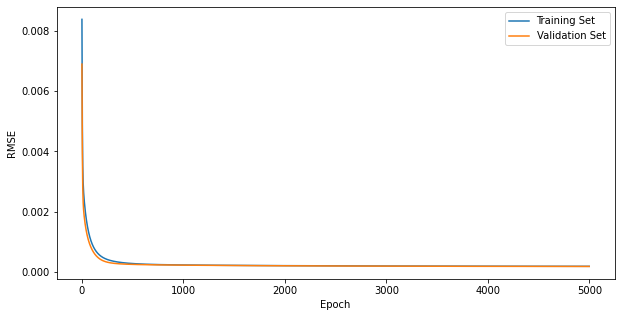

In [ ]:
# plotting training and validation rmse vs epoch

plt.figure(figsize = (10,5))
plt.plot(rmse_grad_train_arr, label = 'Training Set')
plt.plot(rmse_grad_val_arr, label = 'Validation Set')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Mini-Batch and Stochastic Gradient Descent

Here, a mini-batch gradient descent model is run until the convergence threshold (CT) is reached.

The function runs a mini-batch gradient descent model on the data set, when the input data, batch size and learning rate is given as input. It returns the weights, training and validation rmse values, and the time taken to train. The function also lets us know if the model converges or not for a given batch size. If it does converge, the number of epochs  and the learning rate required for convergence is returned.

In [ ]:
def mini_batch_grad(X_train, X_val, y_train, y_val, batch_size, lr, c_threshold):
  num_samples = X_train.shape[0]
  n = num_samples//batch_size
  convergence_condition = 0

  time_arr = []
  rmse_mini_train = []
  rmse_mini_val = []

  w = (np.random.random(X_train.shape[1])/10000).reshape(1,-1)
  
  start_time = time.time()

  for epoch in range(0, 5000):
    count = 0
    shuffled = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[shuffled]
    y_train_shuffled = y_train[shuffled]

    for i in range(0, num_samples, batch_size):
      if count < n:
        X_mini = X_train_shuffled[i:i+batch_size]
        y_mini = y_train_shuffled[i:i+batch_size]

        y_pred_mini_train = np.dot(X_mini, w.T).reshape(-1,1)
        w_mini = (1/batch_size * np.dot(X_mini.T, y_pred_mini_train - y_mini)).reshape(1,-1)
        w = w - (lr * w_mini)

        count += 1
      else:
        break

    rmse_mini_train.append(rmse(y_pred_mini_train, y_mini))

    y_pred_mini_val = np.dot(X_val, w.T).reshape(-1,1)
    rmse_val_value = rmse(y_pred_mini_val, y_val)

    if epoch > 5:
      rmse_3 = rmse_mini_val[-5:]
      if all(rmse_val_value > j for j in rmse_3):
        print('Batch size of {} does not converge'.format(batch_size))
        break

    rmse_mini_val.append(rmse_val_value)
    time_arr.append(time.time() - start_time)

    if rmse_val_value < c_threshold:
      convergence_condition = 1
      print('Convergence for batch size of {} happens at {} epochs and learning rate is {}'.format(batch_size, epoch, lr))
      # print('Number of epochs:', epoch)
      break

  return w, rmse_mini_train, rmse_mini_val, time_arr, convergence_condition

In [ ]:
#different batch sizes
mini_batch_results = {}
batches = []
for k in range(1,14):
  batch_size = 2**k
  batches.append(batch_size)
  mini_batch_results[batch_size] = mini_batch_grad(X_train_ones, X_val_ones, y_train, y_val, batch_size, 0.01, c_threshold)

Batch size of 2 does not converge
Batch size of 4 does not converge
Batch size of 8 does not converge
Batch size of 16 does not converge
Batch size of 32 does not converge
Convergence for batch size of 64 happens at 4 epochs and learning rate is 0.01
Convergence for batch size of 128 happens at 7 epochs and learning rate is 0.01
Convergence for batch size of 256 happens at 11 epochs and learning rate is 0.01
Convergence for batch size of 512 happens at 25 epochs and learning rate is 0.01
Convergence for batch size of 1024 happens at 51 epochs and learning rate is 0.01
Convergence for batch size of 2048 happens at 116 epochs and learning rate is 0.01
Convergence for batch size of 4096 happens at 233 epochs and learning rate is 0.01
Convergence for batch size of 8192 happens at 426 epochs and learning rate is 0.01


**Some Observations**

It can be seen here that, there are a few batch sizes for which the model doesn't converge. However, batch sizes of 64, 128, 256, 512, 1024, 2048, 4096 and 8192 do converge.

In [ ]:
#getting data from the converging batch sizes 
converging_batches = {key: mini_batch_results[key] for key in batches[5:]}

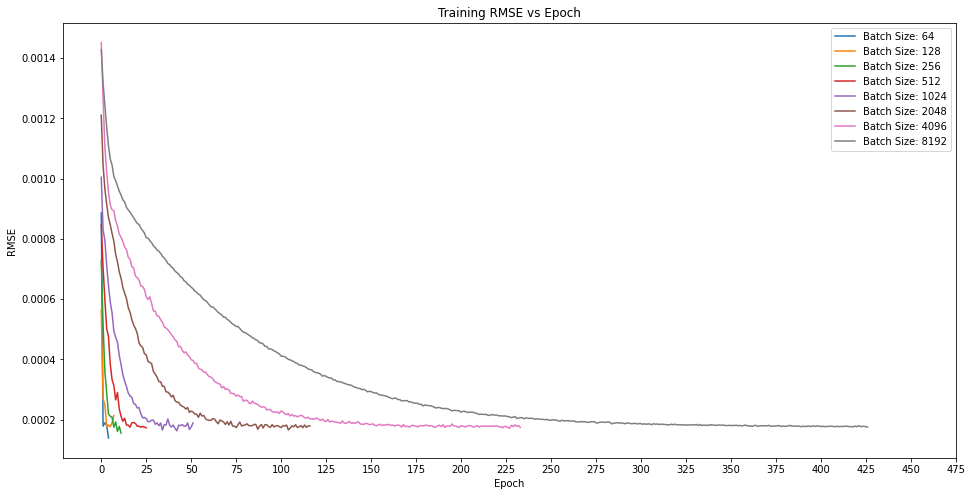

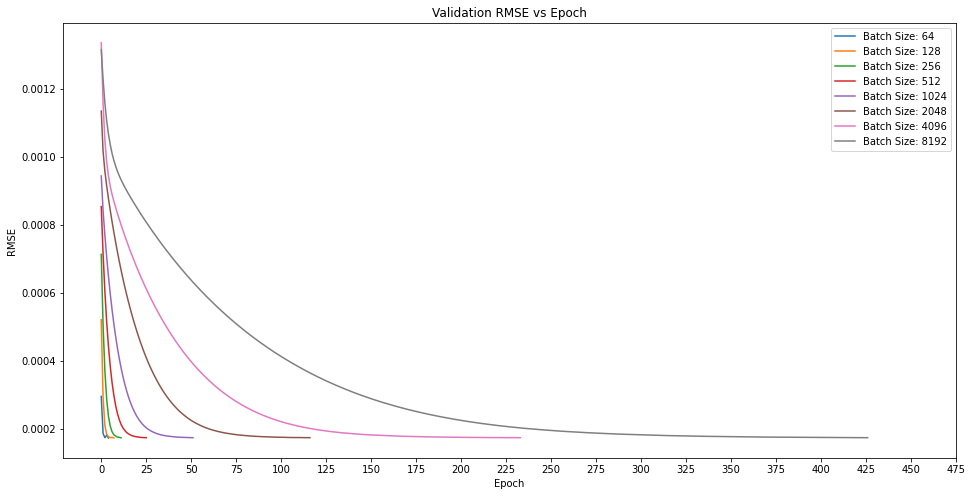

In [ ]:
# plotting training rmse vs epoch
plt.figure(figsize=(16,8))
for k in converging_batches:
  plt.plot(converging_batches[k][1], label = 'Batch Size: ' + str(k))
plt.xticks(range(0,500,25))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Epoch')
plt.legend()
plt.show()
  # print(k)

# plotting validation rmse vs epoch
plt.figure(figsize=(16,8))
for k in converging_batches:
  plt.plot(converging_batches[k][2], label = 'Batch Size: ' + str(k))
plt.xticks(range(0,500,25))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs Epoch')
plt.legend()
plt.show()

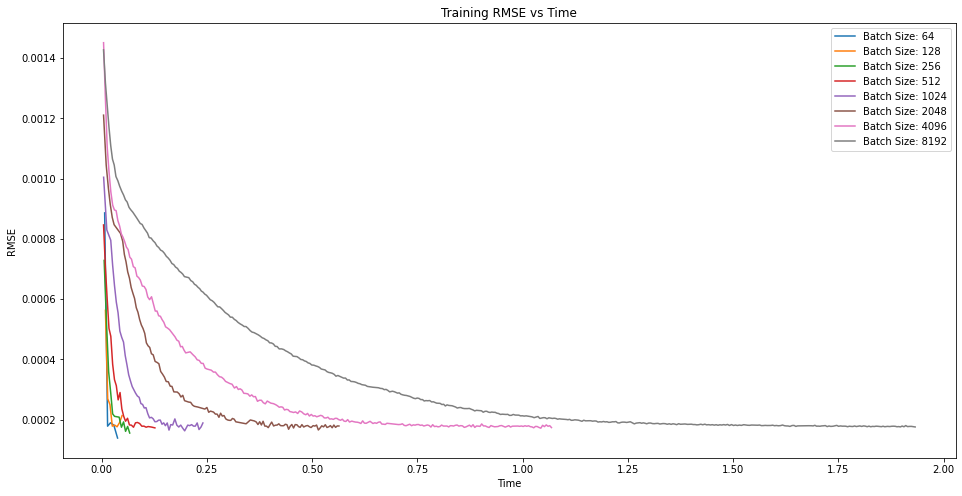

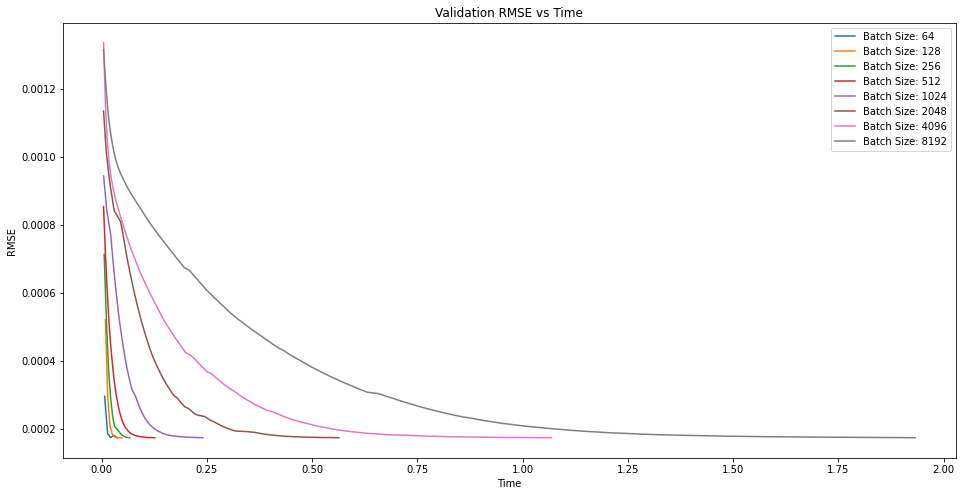

In [ ]:
# plotting training rmse vs time
plt.figure(figsize=(16,8))
for k in converging_batches:
  plt.plot(converging_batches[k][3],converging_batches[k][1], label = 'Batch Size: ' + str(k))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Time')
plt.legend()
plt.show()


# plotting validation rmse vs time
plt.figure(figsize=(16,8))
for k in converging_batches:
  plt.plot(converging_batches[k][3],converging_batches[k][2], label = 'Batch Size: ' + str(k))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs Time')
plt.legend()
plt.show()

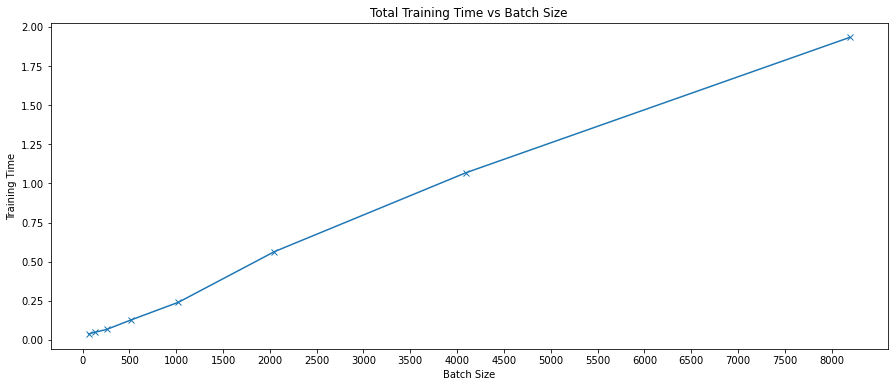

In [ ]:
#plotting total training time vs batch size
total_train_time = []
k_list = []
for k in converging_batches:
  k_list.append(k)
  train_time = converging_batches[k][3][-1]
  total_train_time.append(train_time)

plt.figure(figsize=(15,6))
plt.plot(k_list,total_train_time, marker = 'x')
plt.xticks(range(0,8200,500))
plt.xlabel('Batch Size')
plt.ylabel('Training Time')
plt.title('Total Training Time vs Batch Size')
plt.show()

**Some Observations**

From the RMSE vs Epoch graphs, we can see that the training and validation RMSE for all batch sizes is relatively higher initially. However, as the number of epochs increases, RMSE values reduce and eventually reach a relatively stable value. Out of all the batch sizes, 64 samples per batch has the lowest training and validation RMSE values. It also is the model that takes the lowest number of epochs to converge. Also, curves for training RMSE have noise as the weights are updated based on the training data and it is sensitive to these changes. Validation curves on the other hand are much smoother.

From the RMSE vs Time graphs, lower RMSE values are obtained as the time increases. Batch size of 8192 takes the longest time to train as it requires higher number of epochs to converge. A batch size of 64 is idea as it reaches similar lower values of RMSE in a very short period of time. This can be due to the lower number of epochs required by the model, as observed in the previous graphs.

From the total training time vs batch size graph, we can see that the training time increases significantly with increase in batch size. This is beacause, as observed in previous graphs, larger batch sizes require higher numbers of epochs to converge.

In [ ]:
#tabulating results
bsize_list = []
rmse_tr_list = []
rmse_val_list =[]
time_list = []
for k in converging_batches:
  bsize_list.append(k)
  rmse_tr_list.append(converging_batches[k][1][-1])
  rmse_val_list.append(converging_batches[k][2][-1])
  time_list.append(converging_batches[k][3][-1])

df_1 = pd.DataFrame({
    'Batch Size': bsize_list,
    'Learning Rate': 0.01,
    'Training RMSE': rmse_tr_list,
    'Validation RMSE': rmse_val_list,
    'Time Taken': time_list})
df_1

,Batch Size,Learning Rate,Training RMSE,Validation RMSE,Time Taken
0,64,0.01,0.000139,0.000174,0.037732
1,128,0.01,0.000213,0.000174,0.048416
2,256,0.01,0.000156,0.000174,0.066596
3,512,0.01,0.000173,0.000175,0.126428
4,1024,0.01,0.000189,0.000174,0.240458
5,2048,0.01,0.000179,0.000174,0.563632
6,4096,0.01,0.000174,0.000174,1.068465
7,8192,0.01,0.000176,0.000175,1.932434


## Gradient Descent Learning Rate

Here, the effect of learning rate on convergence is investigated.
Firstly, 3 batch sizes that does not converge with a learning rate of $\alpha= 0.01$ are taken. Then, an appropriate learning rate that results in convergence is found.

Also, the best batch size, with the fastest convergence rate is taken and is swept with various values of learning rates. This is done to find the best learning rate for the best model.

In [ ]:
# finding learning rate for diverging batch sizes

learning_rate = [0.01, 0.005, 0.0025, 0.001, 0.0005, 0.00025, 0.0001, 0.00005, 0.000025]

mini_batch_results_2 = {}
batch_size = []
l_rate = []
rmse_train = []
rmse_val = []

for i in [2, 4, 8]:   #batch sizes that diverge when learbing rate is 0.01
  for j in learning_rate:
    mini_batch_results_2[i] = mini_batch_grad(X_train_ones, X_val_ones, y_train, y_val, i, j, c_threshold)
    if mini_batch_results_2[i][4] == 1:
      # print('Learning rate: ',j)
      batch_size.append(i)
      l_rate.append(j)
      rmse_train.append(mini_batch_results_2[i][1][-1])
      rmse_val.append(mini_batch_results_2[i][2][-1])
      break

Batch size of 2 does not converge
Batch size of 2 does not converge
Batch size of 2 does not converge
Batch size of 2 does not converge
Batch size of 2 does not converge
Convergence for batch size of 2 happens at 3 epochs and learning rate is 0.00025
Batch size of 4 does not converge
Batch size of 4 does not converge
Batch size of 4 does not converge
Batch size of 4 does not converge
Convergence for batch size of 4 happens at 4 epochs and learning rate is 0.0005
Batch size of 8 does not converge
Batch size of 8 does not converge
Batch size of 8 does not converge
Convergence for batch size of 8 happens at 5 epochs and learning rate is 0.001


In [ ]:
#tabulting results
df_2 = pd.DataFrame({
    'Batch Size': batch_size,
    'Learning Rate': l_rate,
    'Training RMSE': rmse_train,
    'Validation RMSE': rmse_val})
df_2

,Batch Size,Learning Rate,Training RMSE,Validation RMSE
0,2,0.00025,0.000078,0.000174
1,4,0.00050,0.000148,0.000173
2,8,0.00100,0.000230,0.000174


From Part 4, batch size of **64** has the fastest convergence time of 0.037732 seconds.

In [ ]:
batch_size_best = 64    #from part 4
mini_batch_results_best = {}
lr_for_best_batch = []
time_taken_best = []

for i in np.arange(1, 11, 1):
  lr = i/1000
  mini_batch_results_best[lr] = mini_batch_grad(X_train_ones, X_val_ones, y_train, y_val, batch_size_best, lr, c_threshold)
  time_taken_best.append(mini_batch_results_best[lr][3][-1])
  if mini_batch_results_best[lr][4] == 1:
    lr_for_best_batch.append(lr)

Convergence for batch size of 64 happens at 29 epochs and learning rate is 0.001
Convergence for batch size of 64 happens at 13 epochs and learning rate is 0.002
Convergence for batch size of 64 happens at 9 epochs and learning rate is 0.003
Convergence for batch size of 64 happens at 7 epochs and learning rate is 0.004
Convergence for batch size of 64 happens at 6 epochs and learning rate is 0.005
Convergence for batch size of 64 happens at 5 epochs and learning rate is 0.006
Convergence for batch size of 64 happens at 4 epochs and learning rate is 0.007
Convergence for batch size of 64 happens at 3 epochs and learning rate is 0.008
Convergence for batch size of 64 happens at 4 epochs and learning rate is 0.009
Convergence for batch size of 64 happens at 2 epochs and learning rate is 0.01


In [ ]:
#checking the time taken for each learning rate
time_taken_best = np.array(time_taken_best)
print(time_taken_best)

[0.2313118  0.10681629 0.07559085 0.07806706 0.05071902 0.04403591
 0.03612757 0.03298235 0.04563379 0.02232885]


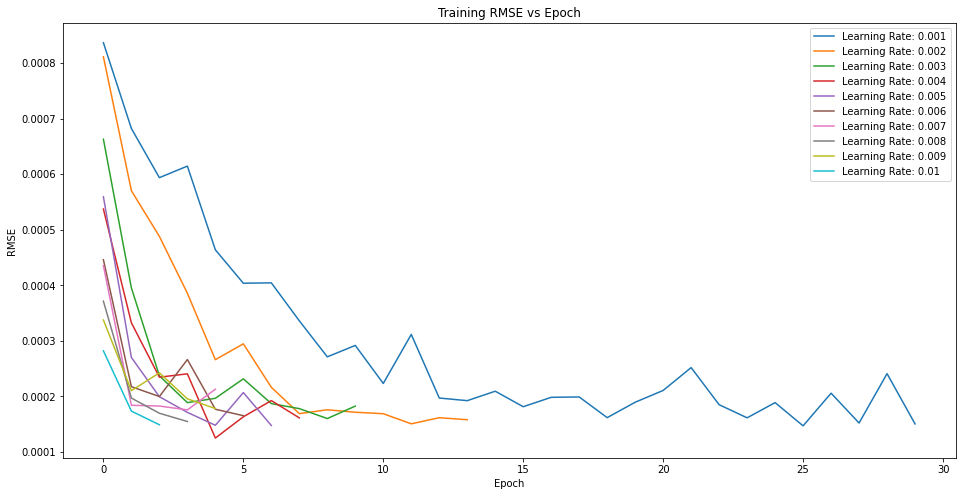

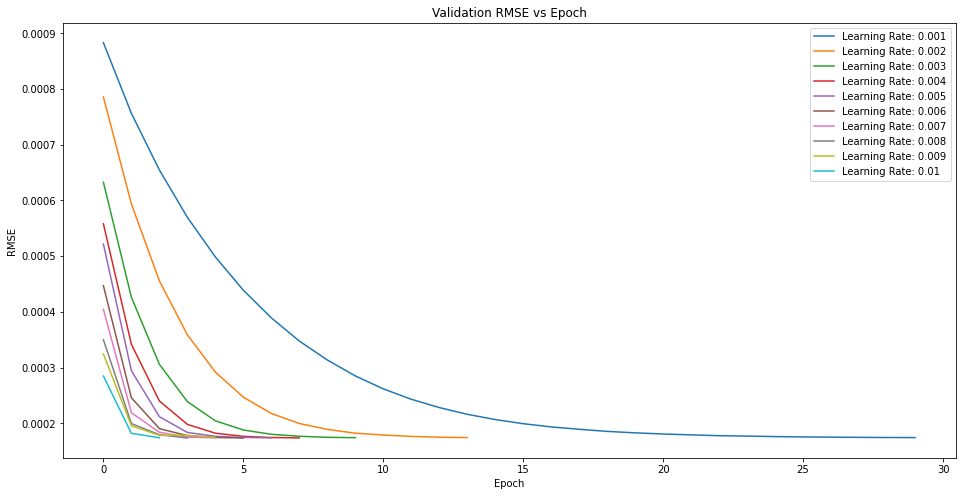

In [ ]:
#plotting training rmse vs epoch
plt.figure(figsize=(16,8))
for k in mini_batch_results_best:
  plt.plot(mini_batch_results_best[k][1], label = 'Learning Rate: ' + str(k))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Epoch')
plt.legend()
plt.show()


#plotting validation rmse vs epoch
plt.figure(figsize=(16,8))
for k in mini_batch_results_best:
  plt.plot(mini_batch_results_best[k][2], label = 'Learning Rate: ' + str(k))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs Epoch')
plt.legend()
plt.show()

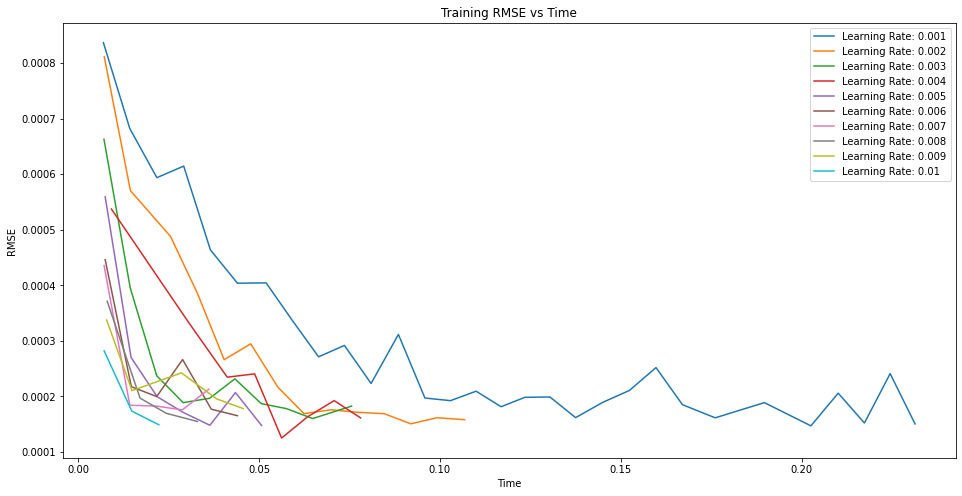

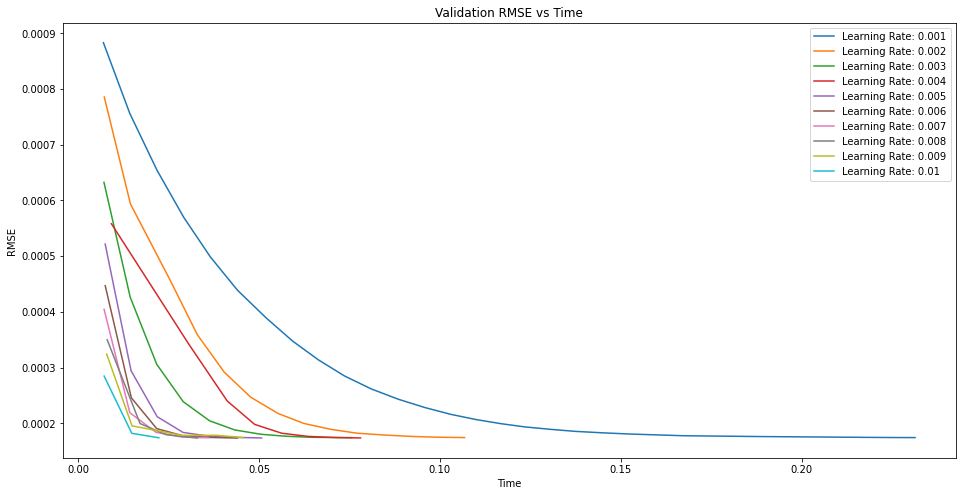

In [ ]:
#plotting training rmse vs time
plt.figure(figsize=(16,8))
for k in mini_batch_results_best:
  plt.plot(mini_batch_results_best[k][3],mini_batch_results_best[k][1], label = 'Learning Rate: ' + str(k))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Time')
plt.legend()
plt.show()
  # print(k)

#plotting validation rmse vs time
plt.figure(figsize=(16,8))
for k in mini_batch_results_best:
  plt.plot(mini_batch_results_best[k][3],mini_batch_results_best[k][2], label = 'Learning Rate: ' + str(k))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Validation RMSE vs Time')
plt.legend()
plt.show()

**Some Observations**

From the RMSE vs Epoch graphs, for the same batch size of 64, we can see that lower learning rates have higher RMSE values. It can also be seem that models with learning rate as 0.01 require lower number of epochs to achieve similar, low RMSE values.

From the RMSE vs Time graphs, for the same batch size of 64, we can see that models with higher learning rates take less time to converge. This is because it takes lower number of epochs to converge. Models with learning rates 0.008, 0.009 and 0.01 take the least amount of time to achieve similar, low RMSE values.

## Choosing the Best Model

From the analysis, the best model is the mini-batch gradient descent model with:

Batch Size: 64

Learning Rate: 0.01

This is beacause it has a low validation RMSE value (from graph). It is also one of the batch sizes to have the lowest number of epochs for convergence and has a fastest convergence time.

In [ ]:
batch_size_final = 64
lr = 0.01
num_samples = X_train_ones.shape[0]
n = num_samples//batch_size_final

rmse_train_final = []
rmse_test = []

test_time = []

w = (np.random.random(X_train_ones.shape[1])/10000).reshape(1,-1)
  
start_time = time.time()

for epoch in range(0, 5000):
  count = 0
  shuffled = np.random.permutation(len(X_train_ones))
  X_train_shuffled = X_train_ones[shuffled]
  y_train_shuffled = y_train[shuffled]

  for i in range(0, num_samples, batch_size_final):
    if count < n:
      X_mini = X_train_shuffled[i:i+batch_size_final]
      y_mini = y_train_shuffled[i:i+batch_size_final]


      y_pred_train = np.dot(X_mini, w.T).reshape(-1,1)
      w_mini = (1/batch_size_final * np.dot(X_mini.T, y_pred_train - y_mini)).reshape(1,-1)
      w = w - (lr * w_mini)

      count += 1
    else:
      break

  y_pred_test = np.dot(X_test_ones, w.T).reshape(-1,1)
  rmse_test_value = rmse(y_pred_test, y_test)

  if epoch > 5:
    rmse_3 = rmse_test[-5:]
    if all(rmse_test_value > j for j in rmse_3):
      print('Batch size of {} does not converge'.format(batch_size_final))
      break

  rmse_test.append(rmse_test_value)
  test_time.append(time.time() - start_time)

  if rmse_test_value < c_threshold:
    # convergence_condition = 1
    print('Convergence for batch size of {} happens at {} epochs and learning rate is {}'.format(batch_size_final, epoch, lr))
    # print('Number of epochs:', epoch)
    break
print('Time for Convergence:', test_time[-1])
print('RMSE of Testing Set: ', rmse_test[-1])

Convergence for batch size of 64 happens at 2 epochs and learning rate is 0.01
Time for Convergence: 0.023937702178955078
RMSE of Testing Set:  0.0001672859134744086


For a batch size of 64, with learning rate 0.01, the model requires 2 epochs and 0.023937 seconds to converge. The RMSE value of test data is 0.000167, which is very close to 0, and this indicates that this is the best model for managing ailerons of an aircraft.